<a href="https://colab.research.google.com/github/isegura/OCW-UC3M-NLPDeep-2023/blob/main/tema4_3_training_we.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Acronimo_y_nombre_uc3m.png" width=50%/>

<h1><font color='#12007a'>Procesamiento de Lenguaje Natural con Aprendizaje Profundo</font></h1>
<p>Autora: Isabel Segura Bedmar</p>

<img align='right' src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" width=15%/>
</center>   

#4.3. ¿Cómo entrenar un modelo de word embeddings?

En este ejercicio, aprenderemos a entrenar un modelo de word embeddings a partir de una colección de textos.
Para ello, utilizaremos la librería Gensim (https://radimrehurek.com/gensim/).







Para entrenar un modelo de word embeddings necesitaríamos una gran colección de textos (por ejemplo, todos los textos de wikipedia). El proceso podría tardar horas.

A modo de ejemplo, en este ejercicio únicamente vamos a utilizar un pequeño conjunto de oraciones.



In [ ]:
# esta es nuestra colección de textos que usaremos
# para entrenar el modelo de word embeddings
texts=["Billy always listens to his mother",
       "He always does what she says",
       "If his mother says, 'Brush your teeth' Billy brushes his teeth",
       "If his mother says, 'Go to bed' Billy goes to bed",
       "Billy is a very good boy",
       "A good boy listens to his mother"]


Comenzamos instalando gensim:

In [ ]:
!pip install -q gensim


El modelo necesita como entrada que los textos sean tokenizados. Podríamos utlizar el método split de str, pero como ya conocemos librerías como spacy o nltk, utilizaremos una de ellas que nos proporcionan una tokenización más robusta que la obtenida con split().
Podríamos aplicar también lematización o stemming, pero simplemente vamos a pasar a minúsculas.

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")


def tokenization(texts):
    """recibe una lista de textos/oraciones y devuelve una lista de listas de tokens"""
    sequences_of_tokens=[]
    for text in texts:
        doc = nlp(text)
        tokens=[]
        for token in doc:
            tokens.append(token.text.lower())
        sequences_of_tokens.append(tokens)

    return sequences_of_tokens


sequences=tokenization(texts)
print(sequences)


[['billy', 'always', 'listens', 'to', 'his', 'mother'], ['he', 'always', 'does', 'what', 'she', 'says'], ['if', 'his', 'mother', 'says', ',', "'", 'brush', 'your', 'teeth', "'", 'billy', 'brushes', 'his', 'teeth'], ['if', 'his', 'mother', 'says', ',', "'", 'go', 'to', 'bed', "'", 'billy', 'goes', 'to', 'bed'], ['billy', 'is', 'a', 'very', 'good', 'boy'], ['a', 'good', 'boy', 'listens', 'to', 'his', 'mother']]


Una vez que tenemos la colección de textos tokenizados, ya podemos entrenar el modelo. Como hemos dicho antes, utilizaremos la librería Gensim, y en particular, su clase **Word2Vec**, que recibe como argumentos los siguientes parámetros:
- la colección de textos tokenizada (es una lista de listas de token).
- vector_size: la dimensión de los vectores
- min_count: todas las palabras con una frecuencia menor que este valor no serán incluidas en el modelo.
- epochs: número de epochs para entrenar el modelo Word2Vec.

Por defecto, utiliza la arquitectura **cbow**. Vamos a entrenar nuestro modelo:



In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sequences, vector_size=10, min_count=2, epochs=100)
word_vectors = model.wv
print(model)

Word2Vec<vocab=15, vector_size=10, alpha=0.025>


Tenemos un modelo con 15 palabras. Consultemos algunos vectores:

In [ ]:
vector = word_vectors['mother']  # numpy vector of a word
print(vector.shape)
print(vector)

(10,)
[ 0.07275508  0.05213695  0.07103128  0.01267101  0.06508178 -0.03744158
 -0.00079871  0.06797002 -0.08599492 -0.0421496 ]


Podemos utilizar los mismos métodos que estudiamos en uno de los ejercicios anteriores del curso (4.2. Librería gensim), aunque podemos ver que los resultados son bastante malos, ya que la colección utilizada para entrenar los vectores es muy pequeña.

In [ ]:
word_vectors.most_similar('mother')


[('teeth', 0.5320941805839539),
 ('good', 0.4433230459690094),
 ("'", 0.42452216148376465),
 ('his', 0.4015263020992279),
 ('if', 0.327894389629364),
 (',', 0.06807553768157959),
 ('bed', 0.06263464689254761),
 ('boy', 0.00275197415612638),
 ('a', -0.02174053154885769),
 ('listens', -0.04804342985153198)]

En la siguiente celda, como la palabra 'sister' no existe en el vocabulario que se ha creado a partir de las ocho oraciones, el código lanza una excepción

In [ ]:
word_vectors.most_similar('sister')


KeyError: ignored

La siguiente función nos permite representar el espacio de los vectores de las palabras:

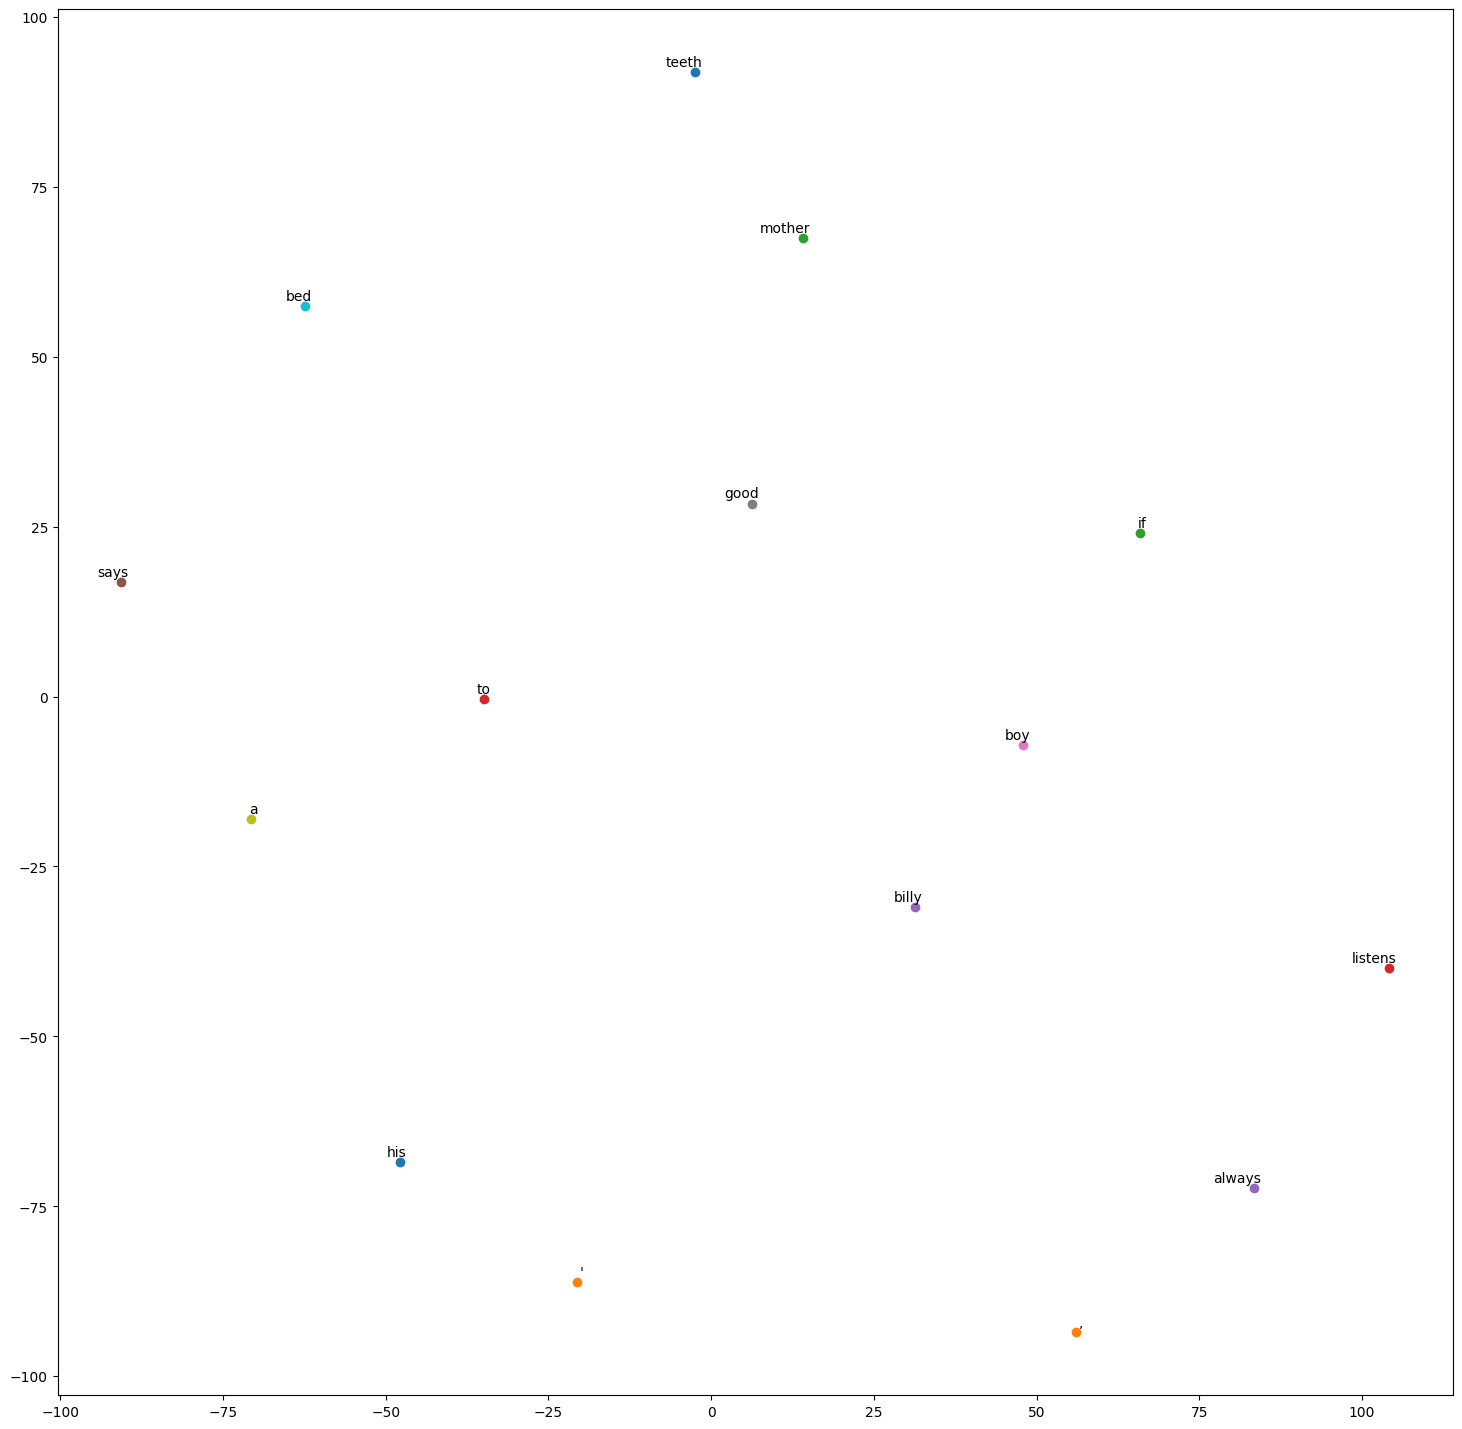

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def tsne_plot(word_vectors, perplexity=40):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    words=list(word_vectors.index_to_key)
    for word in words:
        tokens.append(word_vectors[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=perplexity, n_components=2, init='pca', n_iter=2500, random_state=23)
    tokens = np.array(tokens)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(18, 18))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word_vectors, 5)

## Ejercicio:

Vamos a entrenar un modelo de word embeddings pero con una colección de textos mayor.
Por ejemplo, podemos usar un dataset muy popular sobre revisiones de películas en imdb (https://www.imdb.com/). Varias librerías como nltk o tensorflow, ya proporcionan este dataset, sin necesidad de guardarlo en tu unidad de disco.

Vamos a usar tensorflow para acceder a estos textos:


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# para consultar todos los datasets
#tfds.list_builders()

ds = tfds.load('imdb_reviews', split='train', shuffle_files=True)


En la siguiente celda, únicamente vamos a tomar 1000 ejemplos (para que el modelo se pueda entrenar en poco tiempo), sin embargo lo aconsejable es que se utilice la mayor cantidad posible de textos para obtener mejores representaciones de palabras (embeddings):

In [ ]:
ds=ds.take(1000)
ds

<_TakeDataset element_spec={'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'text': TensorSpec(shape=(), dtype=tf.string, name=None)}>

Convertimos el Dataset de tensorflow en un dataframe de Pandas.

In [ ]:
df=tfds.as_dataframe(ds)
df.head()

,label,text
0,0,"b""This was an absolutely terrible movie. Don't..."
1,0,b'I have been known to fall asleep during film...
2,0,b'Mann photographs the Alberta Rocky Mountains...
3,1,b'This is the kind of film for a snowy Sunday ...
4,1,"b'As others have mentioned, all the women that..."


Los textos están en formato 'bytes'. Lo pasamos a formato str con el método decode. Puede tardar unos minutos.

In [ ]:
df['text'] = df['text'].map(lambda x: x.decode())
df.head()


,label,text
0,0,This was an absolutely terrible movie. Don't b...
1,0,"I have been known to fall asleep during films,..."
2,0,Mann photographs the Alberta Rocky Mountains i...
3,1,This is the kind of film for a snowy Sunday af...
4,1,"As others have mentioned, all the women that g..."


Por último, aplicamos algún método para tokenizar los textos. En este caso, estamos usando split() porque es más rápido, pero también podrías probar con el método anterior de tokenización:

In [ ]:
df['tokens'] = df['text'].map(lambda x: x.split())
df.head()


,label,text,tokens
0,0,This was an absolutely terrible movie. Don't b...,"[This, was, an, absolutely, terrible, movie., ..."
1,0,"I have been known to fall asleep during films,...","[I, have, been, known, to, fall, asleep, durin..."
2,0,Mann photographs the Alberta Rocky Mountains i...,"[Mann, photographs, the, Alberta, Rocky, Mount..."
3,1,This is the kind of film for a snowy Sunday af...,"[This, is, the, kind, of, film, for, a, snowy,..."
4,1,"As others have mentioned, all the women that g...","[As, others, have, mentioned,, all, the, women..."


Pasamos a una lista de listas:

In [ ]:
sequences = df['tokens'].tolist()

Por último, ya podemos entrenar el modelo. En este caso, elegimos que el tamaño de los vectores sea de 25:

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sequences, vector_size=25, min_count=2, epochs=100)
word_vectors = model.wv
print(model)

Word2Vec<vocab=11921, vector_size=25, alpha=0.025>


El vocabulario del modelo es de 11.921 vectores(palabras).

Usamos el modelo para consultar alguna palabras (puedes probar con distintas palabras y distintos métodos de los estudiados anteriormente):

In [ ]:
vector = word_vectors['mother']
vector

array([ 1.4023993 , -1.2453566 , -3.1851804 ,  0.52823246,  1.4207184 ,
        0.39183706, -1.0878984 ,  0.97005606, -3.9592812 ,  1.6487707 ,
       -0.38836026, -1.6578135 ,  4.1082883 , -0.32290772,  2.0306044 ,
        1.2279841 ,  0.91927946, -0.24053733,  0.558407  ,  6.107635  ,
       -0.11274588, -1.8558693 ,  1.6329199 ,  2.3988185 ,  0.70062095],
      dtype=float32)

In [ ]:
word_vectors.most_similar('mother')


[('daughter', 0.8415181636810303),
 ('marriage', 0.8144420981407166),
 ('playboy', 0.8082768321037292),
 ('returns', 0.7955185770988464),
 ('marries', 0.7657381892204285),
 ('daughter,', 0.7630563378334045),
 ('anguish', 0.7627627849578857),
 ('estranged', 0.7568720579147339),
 ('father', 0.7451031804084778),
 ('tormented', 0.7444332242012024)]

Por último, representamos el modelo en un espacio bidimensional (tardará algunos minutos):

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


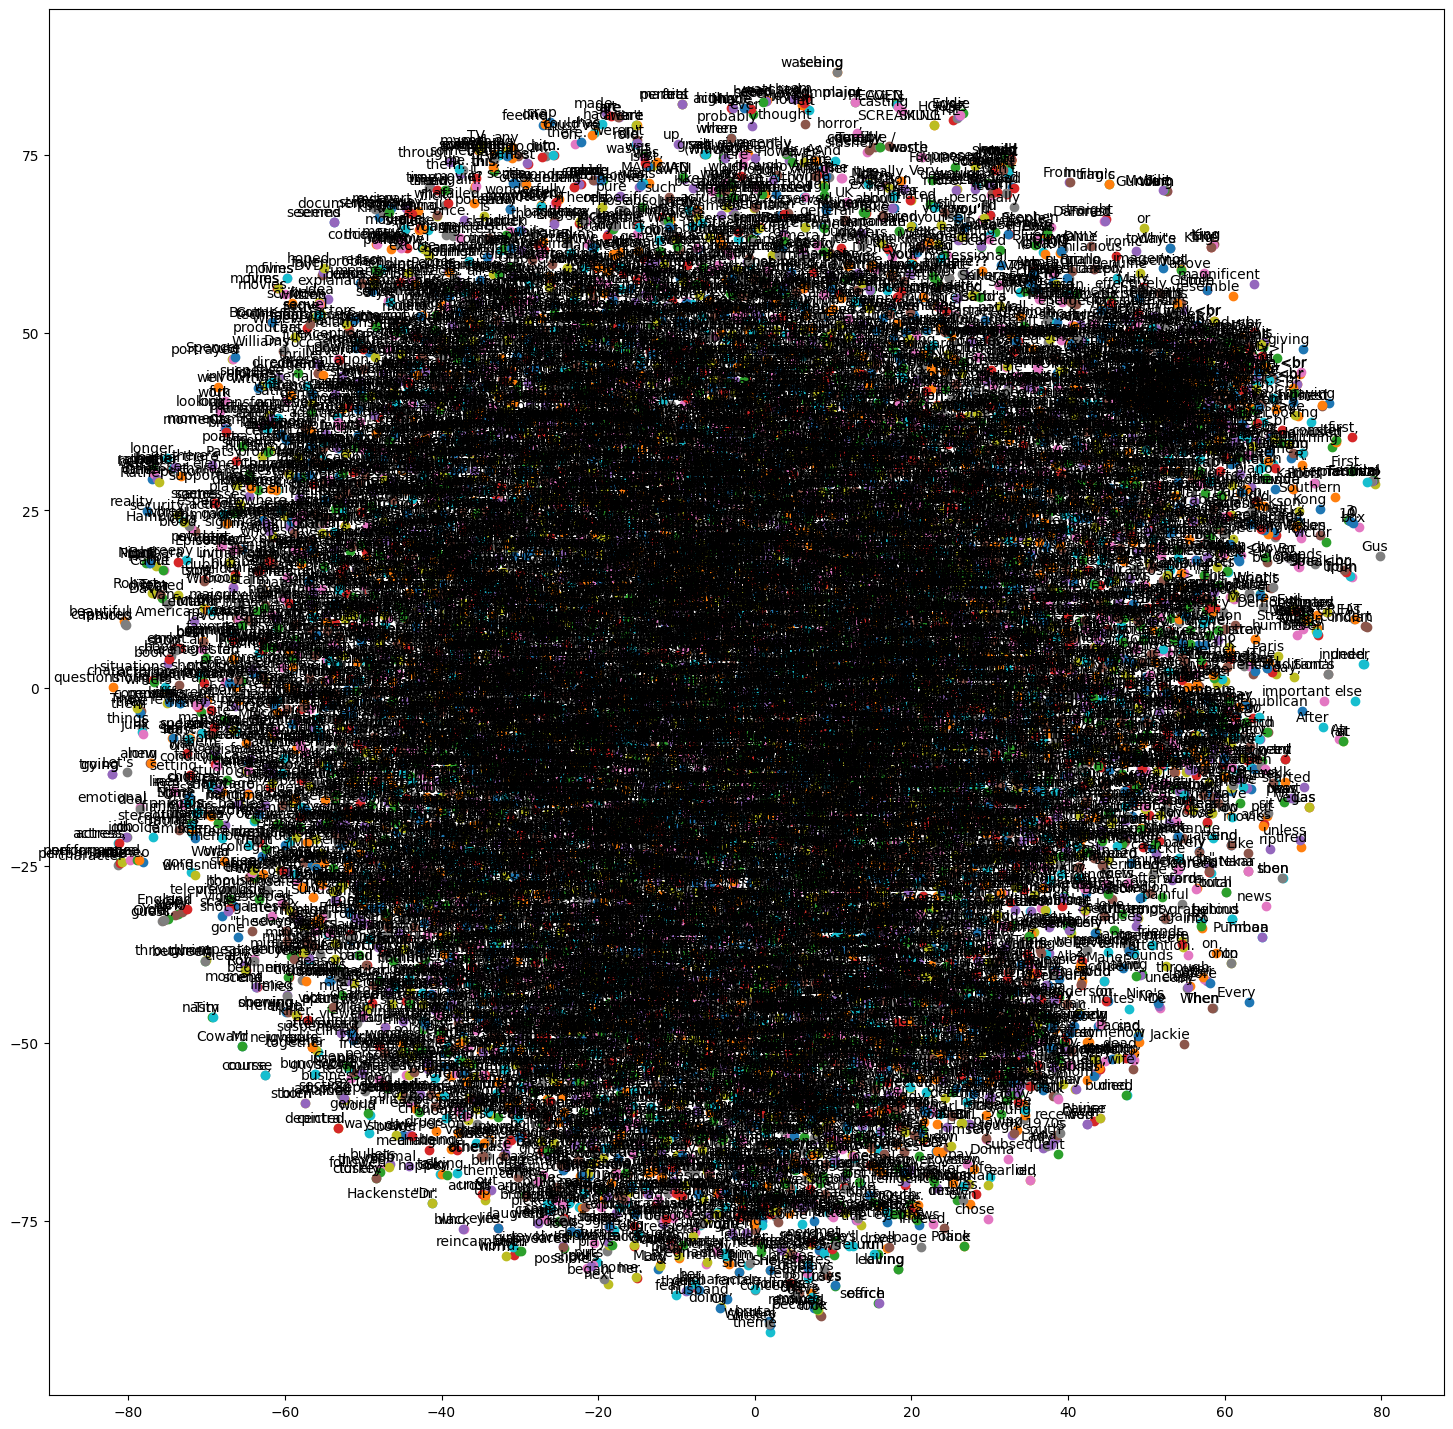

In [ ]:
tsne_plot(word_vectors)